In [13]:
import globus_sdk
# Use native app credentials if you have a client ID
CLIENT_ID = "04dc20ba-d8e4-4a9a-9cc9-3ed3f3d49447" 

# Create a UserApp instance
app = globus_sdk.UserApp(
    app_name="Notebook Main App",
    client_id=CLIENT_ID)

search_client = globus_sdk.SearchClient(app=app)
# transfer_client = globus_sdk.TransferClient(app=app)
# probably need to add https here

# Login if needed (Nick says probably not needed)
app.login()

In [14]:
# INDEX_ID = "6871e83e-866b-41bc-8430-e3cf83b43bdc" # Old XPCS index.
INDEX_ID = "4428cfe6-611b-48db-81b2-167a7d9710ea"

In [15]:
import os
import h5py
from IPython.display import Image
from IPython.display import display
from gladier_xpcs.nb_utils.metadata import extract_metadata_structure
from gladier_xpcs.nb_utils.metadata import extract_entry_key_values


##helpful functions (in development)
def make_query(query_data, show_entries=True, limit=10):
    response = search_client.post_search(
        index_id=INDEX_ID,
        data={"q": query_data, "limit": limit}
        )
    print("Query results: " + str(response['total']))
    if show_entries and response['total']>0:
        print(response['gmeta'][0]["entries"][0]["content"]["dc"]["identifiers"][0]["identifier"])
    return response

def parse_result_files(q_entry):
    entry_files = q_entry[0]['entries'][0]['content']['files'] ## this is a list
    result_file = '' 
    log_file = ''
    image_files = []
    return results_file, log_file, image_files

def plot_images(image_files): # weird call?
    # display(Image(entry_files[4]['url'].replace('globus://74defd5b-5f61-42fc-bcc4-834c9f376a4f', str(here))))
    pass



In [26]:
## This is the wrong query, just for testing
query_data = "bacon"  # Match all entries (or a specific keyword)
make_query(query_data)

Query results: 0


GlobusHTTPResponse({"total":0,"gmeta":[],"@datatype":"GSearchResult","@version":"2017-09-01","offset":0,"count":0,"has_next_page":false})

In [27]:
## Full Milliron query
query_data = "milliron"  # Match all entries (or a specific keyword)
milli_response = make_query(query_data = "milliron")

Query results: 21972
globus://74defd5b-5f61-42fc-bcc4-834c9f376a4f/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/volfrac114985_10nm-frac_a0050_f100000_r00001


In [28]:
#print(response) # Huge return, do not do this

In [29]:
extract_metadata_structure(milli_response)

DC KEYS
{'identifierType', 'subjects', 'name', 'date', 'publisher', 'identifier', 'formats', 'types', 'dates', 'resourceType', 'publicationYear', 'title', 'identifiers', 'schemaVersion', 'resourceTypeGeneral', 'dateType', 'titles', 'version', 'creators'}
PROJECT METADATA KEYS
{'horizontal_center', 'bluesky_plan', 'execution_time_seconds', 'slits_1', 'end_frame', 'short_description', 'extent', 'x_pixel_size', 'x_position', 'scan_id', 'rotation_x', 'parent_folder', 'position_rheo_x', 'beam_center_y', 'source_files', 'overwrite', 'qnw2_temperature', 'plot_time', 'proposal_id', 'datamanagement', 'position_z', 'smooth', 'rotation_y', 'gpu_id', 'qnw1_temperature', 'gap', 'begin_frame', 'device', 'vertical_center', 'beam_center_position_y', 'size', 'verbose', 'incident_polarization_type', 'distance', 'stride_frame', 'qmap', 'wavelength', 'horizontal_gap', 'tools', 'attenuator_index', 'source', 'workflow_kwargs', 'position_rheo_y', 'transmitted_beam_intensity', 'frame_time', 'full_description'

{'dc_keys': {'creators',
  'date',
  'dateType',
  'dates',
  'formats',
  'identifier',
  'identifierType',
  'identifiers',
  'name',
  'publicationYear',
  'publisher',
  'resourceType',
  'resourceTypeGeneral',
  'schemaVersion',
  'subjects',
  'title',
  'titles',
  'types',
  'version'},
 'project_metadata_keys': {'/entry/instrument',
  '/entry/sample',
  '/entry/user',
  '/xpcs/multitau/config',
  'analysis_type',
  'attenuator_1',
  'attenuator_2',
  'attenuator_index',
  'attenuator_transmission',
  'avg_frame',
  'beam_center_position_x',
  'beam_center_position_y',
  'beam_center_x',
  'beam_center_y',
  'beam_stop',
  'begin_frame',
  'bluesky',
  'bluesky_plan',
  'bluesky_plan_kwargs',
  'bluesky_version',
  'compression',
  'count_time',
  'cycle',
  'datamanagement',
  'detector_1',
  'detector_name',
  'device',
  'distance',
  'email',
  'end_frame',
  'energy',
  'execution_time_seconds',
  'experiment',
  'extent',
  'facility',
  'frame_time',
  'full_description'

In [30]:

# Get key-value pairs for the first entry
entry = milli_response["gmeta"][0]
values = extract_entry_key_values(entry)

# Print all DC metadata
print("Dublin Core Metadata:")
for key, value in values["dc"]:
    print(f"{key}: {value}")

# Print all project metadata
print("\nProject Metadata:")
for key, value in values["project_metadata"]:
    print(f"{key}: {value}")

# Print all file metadata
print("\nFile Metadata:")
for key, value in values["files"]:
    print(f"{key}: {value}")

Dublin Core Metadata:
types.resourceTypeGeneral: Dataset
types.resourceType: Dataset
formats.0: application/json
formats.1: text/x-log
formats.2: image/png
formats.3: application/x-hdf
schemaVersion: http://datacite.org/schema/kernel-4
creators.0.name: 
identifiers.0.identifier: globus://74defd5b-5f61-42fc-bcc4-834c9f376a4f/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/volfrac114985_10nm-frac_a0050_f100000_r00001
identifiers.0.identifierType: GlobusSearchSubject
publicationYear: 2025
publisher: 
dates.0.date: 2025-06-07T01:11:37.299783Z
dates.0.dateType: Created
titles.0.title: volfrac114985_10nm-frac_a0050_f100000_r00001
version: 1

Project Metadata:
/entry/user.name: John Doe
/entry/user.institution: Institution Name
/entry/user.proposal_id: none
/entry/user.cycle: 2025-1
/entry/user.email: JohnDoe@mail.edu
source_files.raw.0: /8IDI/2025-1/milliron202503/data/volfrac114985_10nm-frac_a0050_f100000_r00001
source_files.qmap.0: /8IDI/2025-1/milliron202503/data/r

In [31]:


os.chdir('/eagle/projects/XPCS-DATA-DYS')
here = os.getcwd()
# print("ALL FILES ON ENTRY")
entry_files = milli_response['gmeta'][0]['entries'][0]['content']['files'] ## this is a list
for k_file in entry_files:
    print(k_file['filename'])
    print(k_file['url'].replace('globus://74defd5b-5f61-42fc-bcc4-834c9f376a4f', str(here)))


volfrac114985_10nm-frac_a0050_f100000_r00001_results.hdf
/lus/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/volfrac114985_10nm-frac_a0050_f100000_r00001/volfrac114985_10nm-frac_a0050_f100000_r00001_results.hdf
boost_corr.log
/lus/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/volfrac114985_10nm-frac_a0050_f100000_r00001/boost_corr.log
metadata.json
/lus/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/volfrac114985_10nm-frac_a0050_f100000_r00001/resources/volfrac114985_10nm-frac_a0050_f100000_r00001_results/metadata.json
volfrac114985_10nm-frac_a0050_f100000_r00001_results_g2_corr_045_053.png
/lus/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/volfrac114985_10nm-frac_a0050_f100000_r00001/resources/volfrac114985_10nm-frac_a0050_f100000_r00001_results/volfrac114985_10nm-frac_a

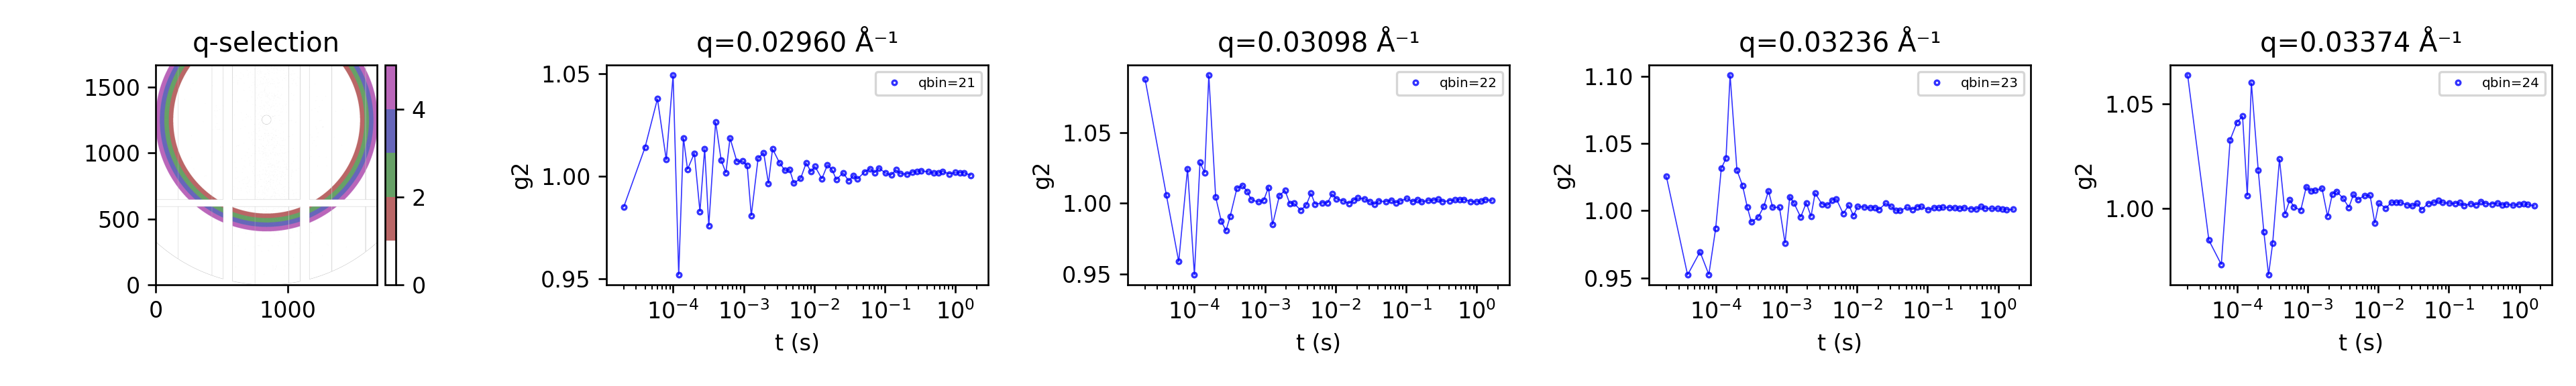

In [32]:
display(Image(entry_files[3]['url'].replace('globus://74defd5b-5f61-42fc-bcc4-834c9f376a4f', str(here))))

In [33]:
f = h5py.File('/lus/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/volfrac315068_26nm-frac_a0118_f100000_r00001/volfrac315068_26nm-frac_a0118_f100000_r00001_results.hdf', 'r')

f.keys()
print(f.keys())
print(f['xpcs'].keys())
print(f['xpcs']['qmap'].keys())

import h5py
import matplotlib.pyplot as plt

q = f['xpcs']['qmap']['dynamic_v_list_dim0'][()]
intensity = f['xpcs']['temporal_mean']['scattering_1d'][()]
print(q.shape)
print(intensity.shape)

# # Plotting
# plt.figure(figsize=(8, 5))
# plt.plot(q, intensity, marker='o', linestyle='-', linewidth=2, markersize=4)
# plt.xlabel("q (1/Å)", fontsize=12)
# plt.ylabel("Intensity (a.u.)", fontsize=12)
# plt.title("1D Scattering Curve", fontsize=14)
# plt.grid(True, which='both', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()


<KeysViewHDF5 ['entry', 'xpcs']>
<KeysViewHDF5 ['multitau', 'qmap', 'spatial_mean', 'temporal_mean']>
<KeysViewHDF5 ['beam_center_x', 'beam_center_y', 'detector_distance', 'dynamic_index_mapping', 'dynamic_num_pts', 'dynamic_roi_map', 'dynamic_v_list_dim0', 'dynamic_v_list_dim1', 'energy', 'map_names', 'map_units', 'mask', 'pixel_size', 'static_index_mapping', 'static_num_pts', 'static_roi_map', 'static_v_list_dim0', 'static_v_list_dim1']>
(36,)
(1, 360)


In [34]:
## Conversation with QZ. search inside an experiment
# Search for *G10* and *D100*
# plot q = f['xpcs']['qmap']['dynamic_v_list_dim0'][()] vs. intensity = f['xpcs']['temporal_mean']['scattering_1d'][()]